<a href="https://colab.research.google.com/github/Jay123ch/Data-Science/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNOWLEDGE OF THE DATA SET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = "latin1")
df = pd.DataFrame(data)
df.head()

<ipython-input-27-96f25984f5ff>:1: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = "latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88811 entries, 0 to 88810
Columns: 135 entries, eventid to related
dtypes: float64(76), int64(1), object(58)
memory usage: 91.5+ MB


In [ ]:
df.shape

(88811, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,end = " , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

CLEANING THE DATA

In [ ]:
df = df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
         "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
         "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type",
                   "targtype1_txt":"Target Type","gname":"Group","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Kill","nwound":"Wound","addnotes":"Add"},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group,Motive,Weapon Type,Kill,Wound,Add
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88811 entries, 0 to 88810
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         88810 non-null  float64
 1   Month        88810 non-null  float64
 2   Day          88810 non-null  float64
 3   Country      88810 non-null  object 
 4   Region       88810 non-null  object 
 5   Province     88392 non-null  object 
 6   City         88658 non-null  object 
 7   Latitude     84789 non-null  float64
 8   Longitude    84788 non-null  float64
 9   Location     8557 non-null   object 
 10  Summary      22681 non-null  object 
 11  Attack Type  88810 non-null  object 
 12  Target Type  88810 non-null  object 
 13  Group        88810 non-null  object 
 14  Motive       22142 non-null  object 
 15  Weapon Type  88810 non-null  object 
 16  Kill         82339 non-null  float64
 17  Wound        79143 non-null  float64
 18  Add          7583 non-null   object 
dtypes: f

In [ ]:
df.shape

(88811, 19)

In [ ]:
df.isnull().sum()

Year               1
Month              1
Day                1
Country            1
Region             1
Province         419
City             153
Latitude        4022
Longitude       4023
Location       80254
Summary        66130
Attack Type        1
Target Type        1
Group              1
Motive         66669
Weapon Type        1
Kill            6472
Wound           9668
Add            81228
dtype: int64

In [ ]:
df["Kill"] = df["Kill"].fillna(0)
df["Wound"] = df["Wound"].fillna(0)
df["Casualities"] = df["Kill"]+df["Wound"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casual,Casualities
count,88810.000000,88810.000000,88810.000000,84789.000000,8.478800e+04,88811.000000,88811.000000,88811.000000,88811.000000
mean,1990.987456,6.402421,15.268326,20.324709,-1.015563e+03,2.270248,2.882042,5.152290,5.152290
std,9.407706,3.360916,8.827924,22.751115,2.959845e+05,11.804584,47.495511,54.976849,54.976849
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,4.000000,8.000000,6.811786,-7.410606e+01,0.000000,0.000000,0.000000,0.000000
50%,1990.000000,6.000000,15.000000,24.891115,8.742907e+00,0.000000,0.000000,1.000000,1.000000
75%,1997.000000,9.000000,23.000000,36.991540,4.462382e+01,1.000000,1.000000,3.000000,3.000000
max,2008.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000,9574.000000


**Observation**
1. The Data consists of Terrorists attacks from the range of 1970 to 2017
2. Maximum the attacks were held 31 days.
3. The number of people were killed in this attack : 1570
4. The number of people were Wounded are : 8191
5. The Total no. of people are : 9574

**VISUALISE THE DATA**
1. Number of attacks in each year


In [ ]:
war = df["Year"].value_counts(dropna = False).sort_index().to_frame().reset_index().rename(columns = {"index":"Year","Year":"Attacks"}).set_index("Year")
print(war)

        Attacks
Year           
1970.0      651
1971.0      471
1972.0      568
1973.0      473
1974.0      581
1975.0      740
1976.0      923
1977.0     1319
1978.0     1526
1979.0     2662
1980.0     2662
1981.0     2586
1982.0     2544
1983.0     2870
1984.0     3495
1985.0     2915
1986.0     2860
1987.0     3183
1988.0     3721
1989.0     4324
1990.0     3887
1991.0     4683
1992.0     5071
1994.0     3456
1995.0     3081
1996.0     3058
1997.0     3197
1998.0      934
1999.0     1395
2000.0     1814
2001.0     1906
2002.0     1333
2003.0     1278
2004.0     1166
2005.0     2017
2006.0     2758
2007.0     3242
2008.0     3460
NaN           1


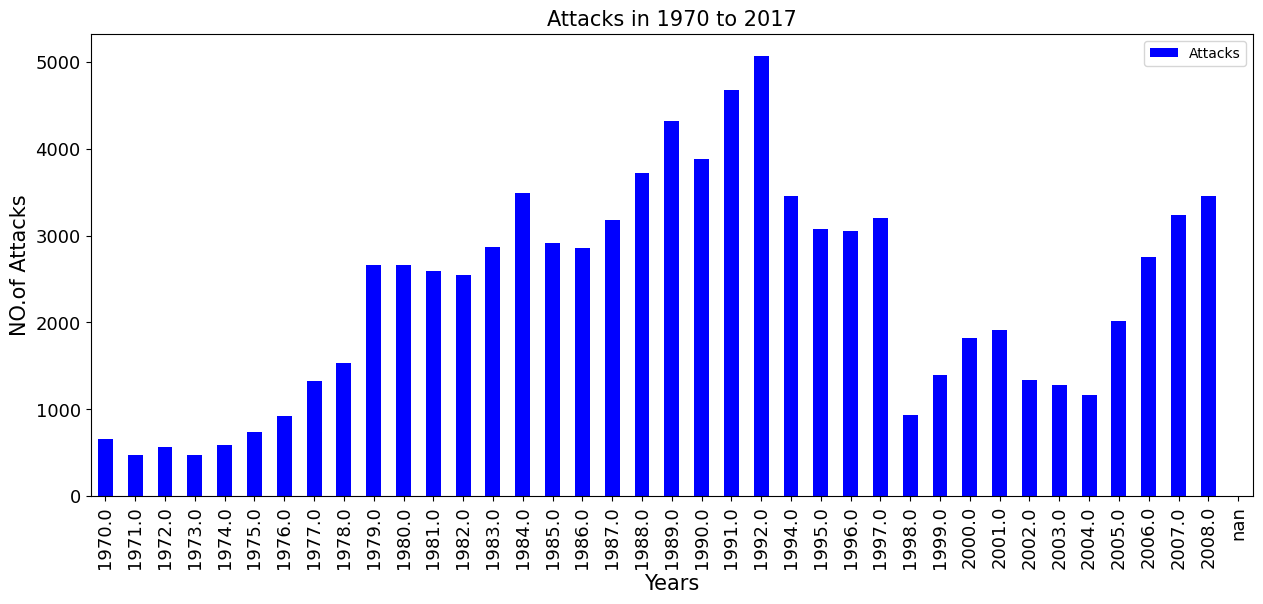

In [ ]:
war.plot(kind = "bar",color = "blue",figsize = (15,6),fontsize = 13)
plt.title("Attacks in 1970 to 2017",fontsize=15)
plt.xlabel("Years",fontsize = 15)
plt.ylabel("NO.of Attacks",fontsize = 15)
plt.show()

**Observation**
1. In 1992 the attacks will be high
2.In both 1971 and 1973 the attacks will be Low

**2. City Wise Attacks**

In [ ]:
cit = pd.crosstab(df.Year,df.Region)
cit.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970.0,1,7,0,2,12,28,472,65,1,10,3,50
1971.0,1,5,0,1,5,55,247,24,0,6,2,125
1972.0,8,3,0,0,1,53,73,33,1,16,4,376
1973.0,1,6,0,2,1,19,64,83,1,2,4,290
1974.0,1,11,0,4,2,42,111,81,2,3,7,317


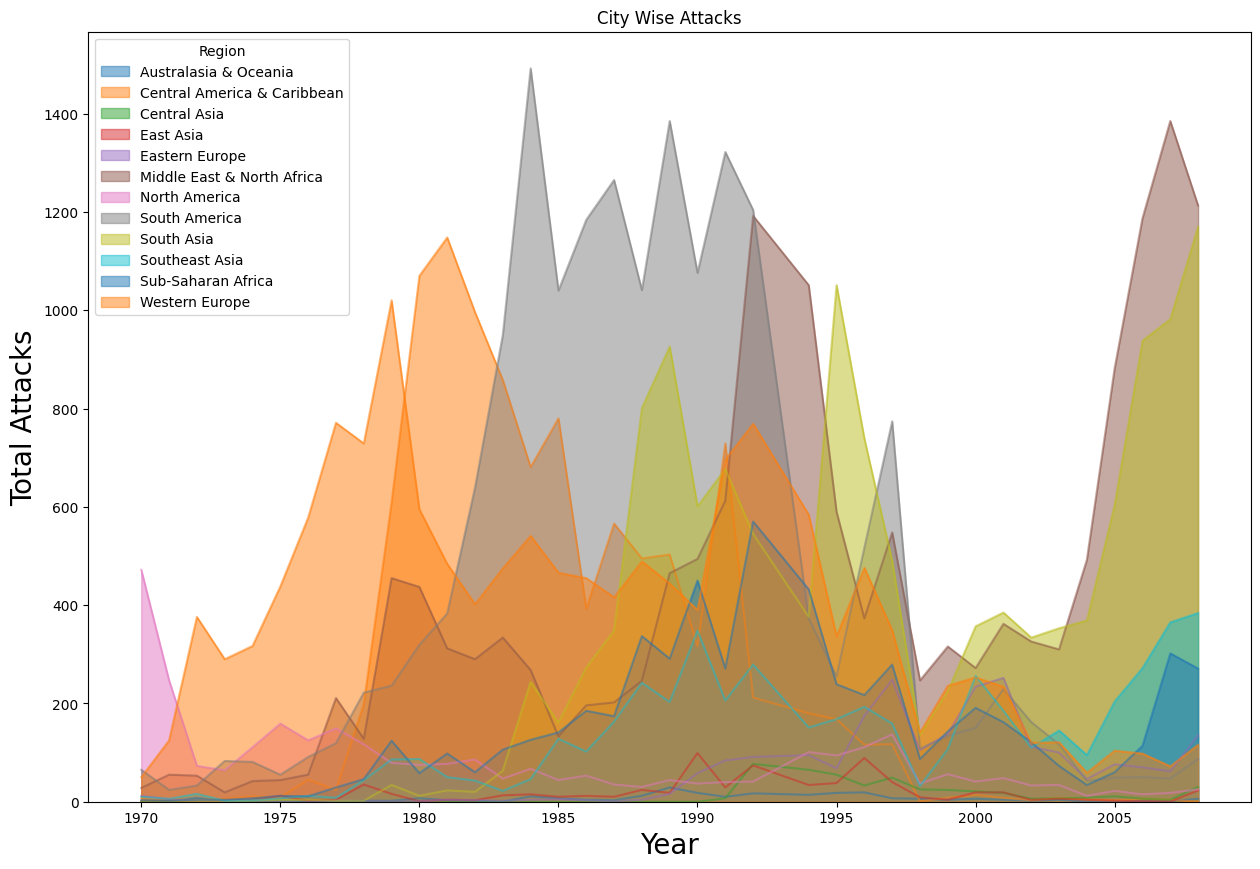

In [ ]:
cit.plot(kind = "area", stacked = False, alpha=0.5,figsize=(15,10))
plt.title("City Wise Attacks")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Total Attacks",fontsize=20)
plt.show()

**3.Total Casuality in the Attacks**

In [ ]:
ca = df[["Region","Casualities"]].groupby("Region").sum().sort_values(by="Casualities",ascending = False)
ca

,Casualities
Region,
Middle East & North Africa,123607.0
South Asia,106397.0
Sub-Saharan Africa,52816.0
South America,42304.0
Central America & Caribbean,37594.0
Southeast Asia,26117.0
North America,24174.0
Western Europe,22046.0
Eastern Europe,10749.0


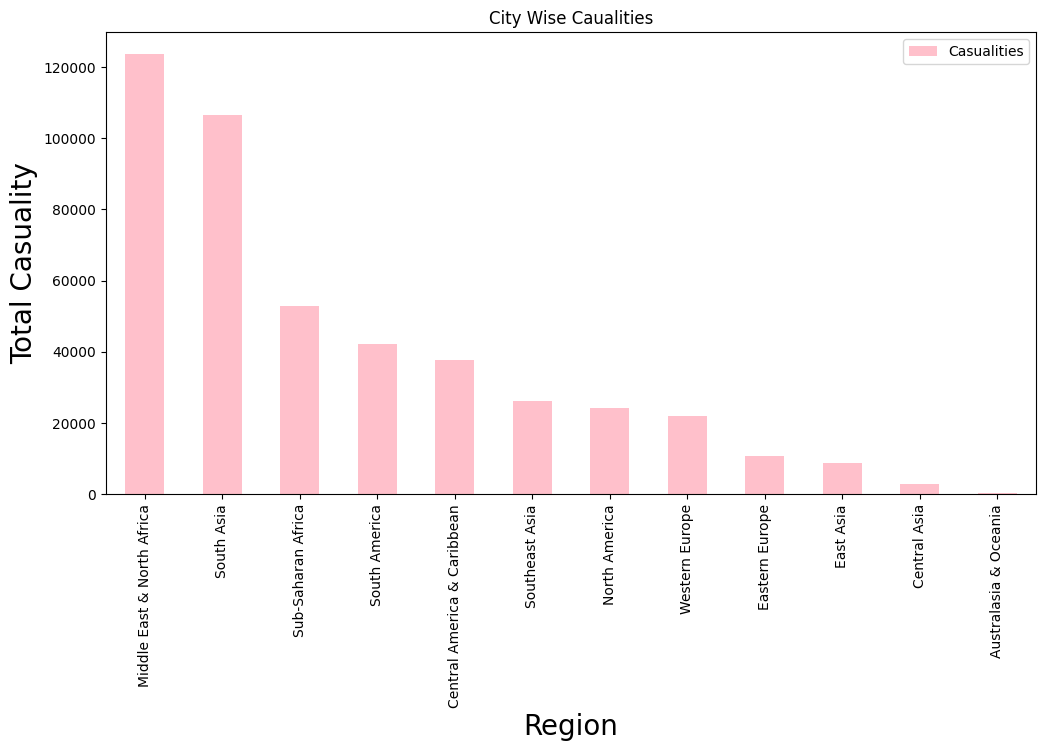

In [ ]:
ca.plot(kind="bar",figsize=(12,6),color="pink")
plt.title("City Wise Caualities")
plt.xlabel("Region",fontsize=20)
plt.ylabel("Total Casuality",fontsize=20)
plt.show()

**4.Country wise attacks**

In [ ]:
co = df["Country"].value_counts().head(20)
co

Colombia          7024
Peru              6043
El Salvador       5320
India             4755
United Kingdom    4468
Iraq              3958
Spain             3195
Pakistan          2884
Sri Lanka         2864
Turkey            2732
Philippines       2702
United States     2560
France            2468
Algeria           2387
Chile             2291
Guatemala         2043
Lebanon           1995
Nicaragua         1968
South Africa      1918
Israel            1528
Name: Country, dtype: int64

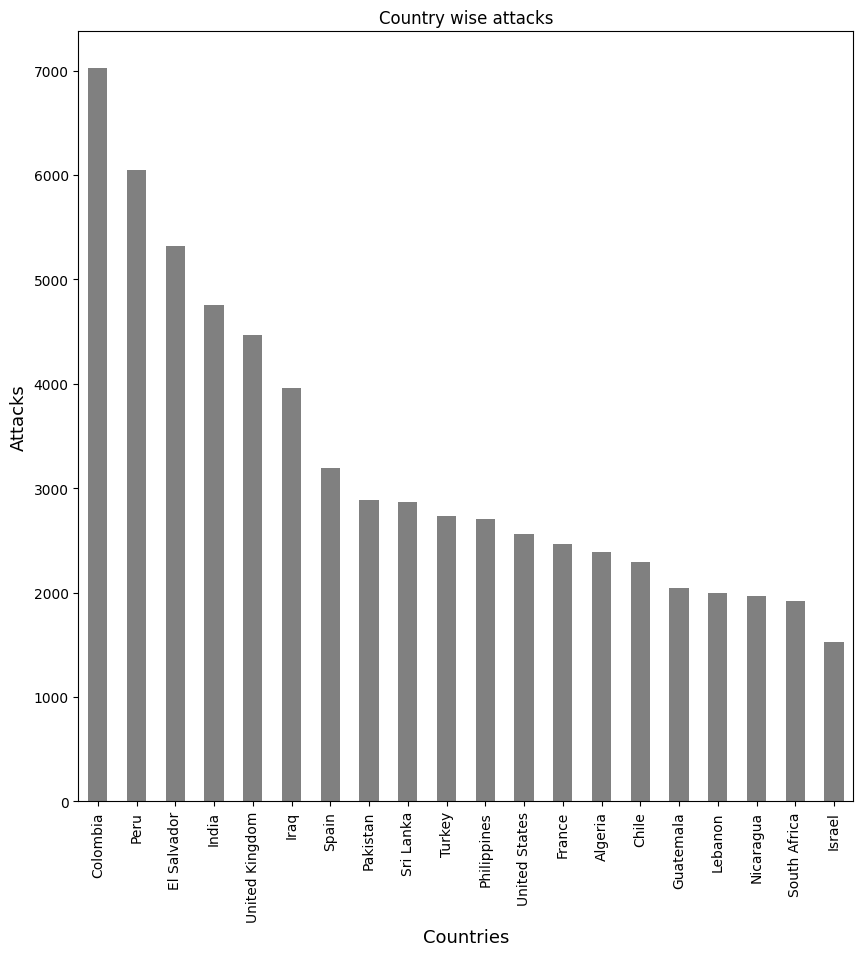

In [ ]:
co.plot(kind = "bar",figsize=(10,10),color="grey")
plt.title("Country wise attacks")
plt.xlabel("Countries",fontsize=13)
plt.ylabel("Attacks",fontsize=13)
plt.show()

**5.Terrorist group wise attacks**

In [ ]:
gr=df["Group"].value_counts()[1:10]
gr

Shining Path (SL)                                   4515
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2670
Basque Fatherland and Freedom (ETA)                 1999
Revolutionary Armed Forces of Colombia (FARC)       1700
Liberation Tigers of Tamil Eelam (LTTE)             1560
National Liberation Army of Colombia (ELN)          1269
Kurdistan Workers' Party (PKK)                      1166
New People's Army (NPA)                             1155
Name: Group, dtype: int64

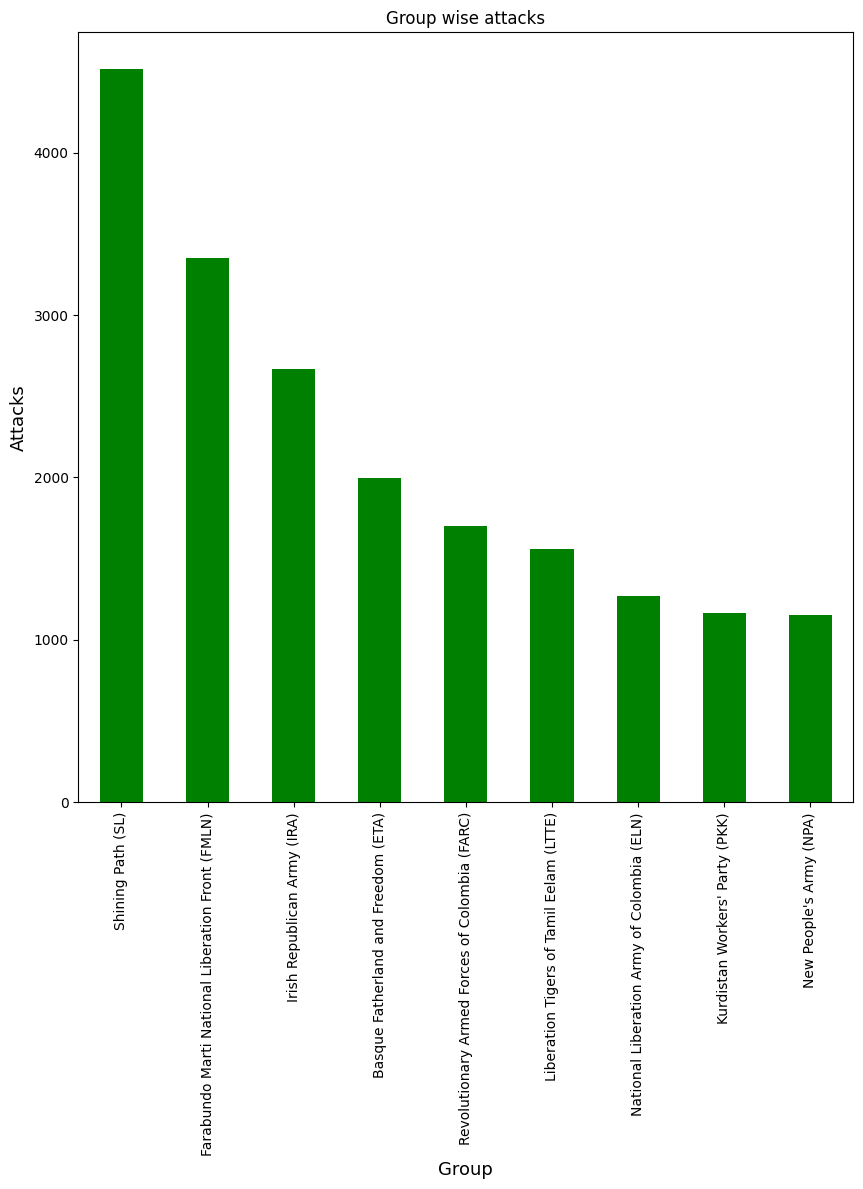

In [ ]:
gr.plot(kind = "bar",figsize=(10,10),color="green")
plt.title("Group wise attacks")
plt.xlabel("Group",fontsize=13)
plt.ylabel("Attacks",fontsize=13)
plt.show()

In [ ]:
at = df["Attack Type"].value_counts()
at

Bombing/Explosion                      39518
Armed Assault                          21137
Assassination                          13517
Facility/Infrastructure Attack          5590
Hostage Taking (Kidnapping)             4416
Unknown                                 3021
Hostage Taking (Barricade Incident)      658
Unarmed Assault                          556
Hijacking                                397
Name: Attack Type, dtype: int64

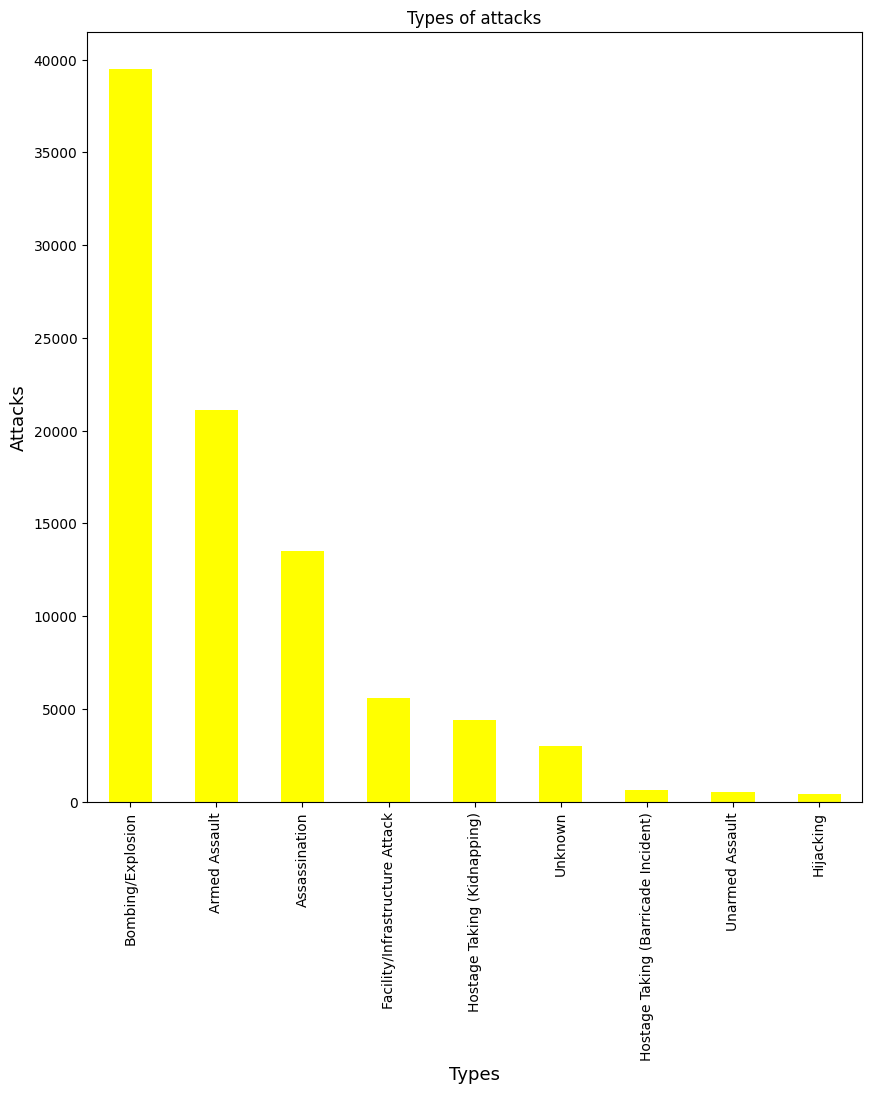

In [ ]:
at.plot(kind = "bar",figsize=(10,10),color="yellow")
plt.title("Types of attacks")
plt.xlabel("Types",fontsize=13)
plt.ylabel("Attacks",fontsize=13)
plt.show()

In [ ]:
ac = df[["Attack Type","Casualities"]].groupby("Attack Type").sum().sort_values(by="Casualities",ascending=False)
ac

,Casualities
Attack Type,
Bombing/Explosion,231472.0
Armed Assault,138783.0
Assassination,24707.0
Hijacking,20414.0
Unknown,19764.0
Unarmed Assault,9793.0
Hostage Taking (Kidnapping),5360.0
Facility/Infrastructure Attack,4324.0
Hostage Taking (Barricade Incident),2963.0


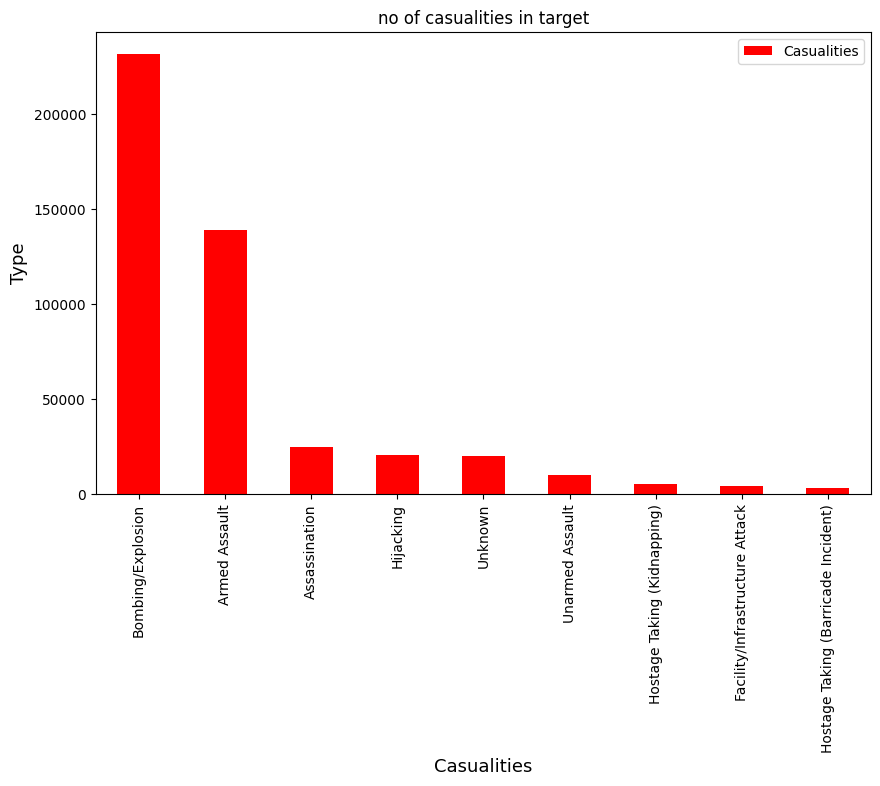

In [ ]:
ac.plot(kind = "bar",figsize=(10,6),color ="red")
plt.title("no of casualities in target")
plt.xlabel("Casualities",fontsize=13)
plt.ylabel("Type",fontsize=13)
plt.show()